# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


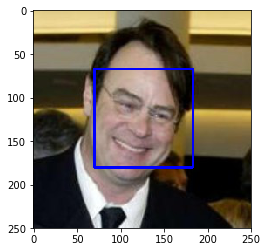

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

* **98%** of the first 100 images in the human_files have a detected human face
* **17%** of the first 100 images in the dog_files have a detected human face

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def face_detector_test(imgs):
    '''
    Detect if the input image contains human face.
    
    Input - imgs
    Output - face_cnt: detected total human faces
             total_cnt: total image number
    '''
    face_cnt = 0
    total_cnt = len(imgs)

    for img in tqdm(imgs):
        face_cnt += face_detector(img)
    
    return face_cnt/total_cnt*100

In [5]:
face_percent_humanfile = face_detector_test(human_files_short)
face_percent_dogfile = face_detector_test(dog_files_short)

100%|██████████| 100/100 [01:15<00:00,  4.21it/s]


In [6]:
print('{}% of the first 100 images in the human_files have a detected human face'.format(face_percent_humanfile))
print('{}% of the first 100 images in the dog_files have a detected human face'.format(face_percent_dogfile))

98.0% of the first 100 images in the human_files have a detected human face
17.0% of the first 100 images in the dog_files have a detected human face


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

In [8]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

In [9]:
from PIL import Image
import torchvision.transforms as transforms

In [10]:
def process_img(img_path):
    '''
    change the format of image at specified path to VGG-16 model accepted format 
    
    Input - img_path: path to an image    
    Output - img: VGG16 image input formated image
    '''
    img = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224), 
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
    # remove the alphas chanel so the final input has 3 channels, also add the batch dimension
    img = transform(img)[:3,:,:].unsqueeze(0)
    return img



def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Input - img_path: path to an image
    Output - Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    # Load and pre-process an image from the given img_path
    img = process_img(img_path)
    
    # move model input to cuda if cuda is available
    if use_cuda:
        img = img.cuda()
    # get img output class
    output = VGG16(img)
    _, pred = torch.max(output, 1)    
    # Return the *index* of the predicted class for that image
    pred_index = pred.item()
    
    return pred_index

In [11]:
VGG16_predict(dog_files_short[0])

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    return pred >= 151 and pred <= 268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

* 0% of the images in `human_files_short` have a detected dog face
* 100% of the images in `dog_files_short` have a detected dog face

In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def dog_detector_test(imgs):
    '''
    Detect if the input image contains human face.
    
    Input - imgs
    Output - dog_cnt: detected total dog faces
             total_cnt: total image number
    '''
    dog_cnt = 0
    total_cnt = len(imgs)
    for img in tqdm(imgs):
        dog_cnt += dog_detector(img)
        
    return dog_cnt/total_cnt*100

In [14]:
dog_percent_humanfile = dog_detector_test(human_files_short)
dog_percent_dogfile = dog_detector_test(dog_files_short)

100%|██████████| 100/100 [01:29<00:00,  1.13it/s]


In [15]:
print('{}% of the first 100 images in the human_files have a detected dog face'.format(dog_percent_humanfile))
print('{}% of the first 100 images in the dog_files have a detected dog face'.format(dog_percent_dogfile))

0.0% of the first 100 images in the human_files have a detected dog face
100.0% of the first 100 images in the dog_files have a detected dog face


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [16]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# define training, validation data, test data directories
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    
data_transforms = {'train': transforms.Compose([transforms.Resize(256),
                                                transforms.RandomResizedCrop(224), 
                                                transforms.RandomHorizontalFlip(),
                                                transforms.ToTensor(),
                                                normalize]),
                   'valid': transforms.Compose([transforms.Resize(256),
                                                transforms.CenterCrop(224), 
                                                transforms.ToTensor(),
                                                normalize]),
                   'test': transforms.Compose([transforms.Resize(256),
                                               transforms.CenterCrop(224), 
                                               transforms.ToTensor(),
                                               normalize])
                  }

# load and transform data using ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['valid'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

# print out some data stats
print('Num training images: ', len(train_data.classes))
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num test images: ', len(test_data))
    
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=False)
# store the data loaders
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

Num training images:  133
Num training images:  6680
Num validation images:  835
Num test images:  836


In [17]:
# check the data size
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape

torch.Size([20, 3, 224, 224])

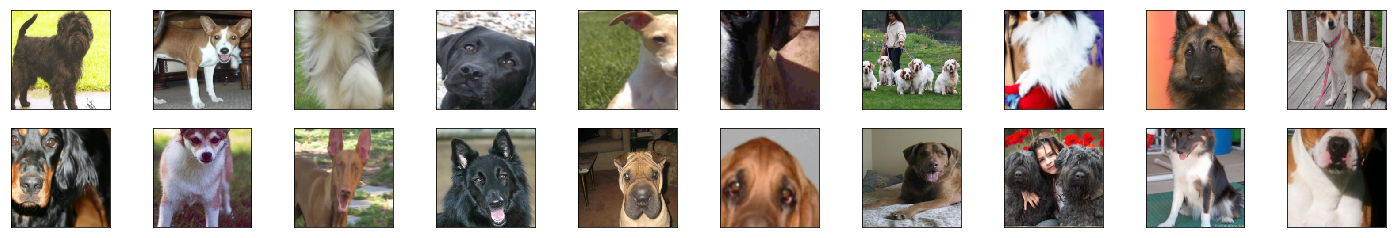

In [18]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225])
dataiter = iter(loaders_scratch['train'])
#print(train_data.shpae)
im, la = dataiter.next()
#print(la)
#print(im.max())
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    tensor = im[idx]
    #print(tensor.max())
    tensor1=inv_normalize(tensor)
   #print(tensor1.max())
    image = tensor1.to("cpu").clone().detach()
    image = tensor1.numpy()
    #print (image.max())
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(image, (1, 2, 0)))

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

* I used `RandomResizedCrop` on the `train_data` to randomly crop, used `CentorCrop` on the `valid_data` and `test_data` to centor crop the the given image to size 224, which is the standard image size when using the VGG16 model. `RandomResizedCrop` on the `train_data` add randomness and may help the model learn better.
* I did use `RandomHorizontalFlip` to randomly flip only the training data to add more randomness for the model to learn in the training process. This might help prevent overfitting and also result in better prediction on the unseen test data.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [19]:
import torch.nn as nn
import torch.nn.functional as F

num_class = len(train_data.classes)

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # conv1:
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        # conv2:
#         self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        # conv3:
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        # maxpooling:
        self.pool = nn.MaxPool2d(2, 2)
        # linear:
#         self.fc1 = nn.Linear(7*7*128, 512)
        self.fc1 = nn.Linear(14*14*128, 512)
        # output: 
        self.fc2 = nn.Linear(512, num_class)
        # dropout:
#         self.dropout = nn.Dropout(0.5)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        # flatten
        x = x.view(-1, 14*14*128)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [20]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

As printed above, my CNN architecture is:
* (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
* Relu activation
* (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
* (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* Relu activation
* (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
* (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
* Relu activation
* (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
* (dropout): Dropout(p=0.5)
* (fc1): Linear(in_features=25088, out_features=512, bias=True)
* (dropout): Dropout(p=0.5)
* (fc2): Linear(in_features=512, out_features=133, bias=True)


**Discussion:**

I constructed a simple CNN with 3 convolutinal layers and 2 fully connected linear layers since the required minimum accuray is 10%, I have to consider the calculation time cost will increase if I construct the CNN too deep and complicated. 

With that, the first convolutional layer has depth of 32, filter size of 3, stride of 2 and padding of 1, which will downsize my image size by 2. The second convolutional layer has a deeper depth of 64, filter size of 3, stride of 3, and padding of 1, which will not change the image size, but only increase the depth. The third convolutional layer is similar to the second one except it increase the depth to 128. 

After each convolutional layer, a maxpooling layer with size 2 and stride 2 is added to reduce each layer dimension by 2. The output dimension by now is reduced by 16. Dropout layer is added here with 0.5 probabilty to prevent overfiting. Then a fully connected linear layer is added with input dimension 25088 and output dimension 512. Similarly, dropout layer is added. Finally, the output layer is added with input dimension 512 and output dimension 133(the total class numbers). 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [21]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
# optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.005)
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [22]:
# to prevent encounted error later OSError: image file is truncated (150 bytes not processed)
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [23]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly   
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...\n'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        else:
            print('\n')
            
    # return trained model
    return model

In [24]:
# train the model
from workspace_utils import active_session
n_epochs = 20

with active_session():
    model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch 1, Batch 1 loss: 4.893214
Epoch 1, Batch 101 loss: 4.886271
Epoch 1, Batch 201 loss: 4.874276
Epoch 1, Batch 301 loss: 4.858737
Epoch: 1 	Training Loss: 4.851480 	Validation Loss: 4.671063
Validation loss decreased (inf --> 4.671063).  Saving model ...

Epoch 2, Batch 1 loss: 4.724939
Epoch 2, Batch 101 loss: 4.703889
Epoch 2, Batch 201 loss: 4.691093
Epoch 2, Batch 301 loss: 4.676982
Epoch: 2 	Training Loss: 4.669141 	Validation Loss: 4.536989
Validation loss decreased (4.671063 --> 4.536989).  Saving model ...

Epoch 3, Batch 1 loss: 4.488867
Epoch 3, Batch 101 loss: 4.606296
Epoch 3, Batch 201 loss: 4.580568
Epoch 3, Batch 301 loss: 4.577628
Epoch: 3 	Training Loss: 4.578537 	Validation Loss: 4.362045
Validation loss decreased (4.536989 --> 4.362045).  Saving model ...

Epoch 4, Batch 1 loss: 4.406067
Epoch 4, Batch 101 loss: 4.524324
Epoch 4, Batch 201 loss: 4.526847
Epoch 4, Batch 301 loss: 4.525583
Epoch: 4 	Training Loss: 4.527180 	Validation Loss: 4.308603
Validation loss

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [25]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('\nTest Loss: {:.6f}'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [26]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)


Test Loss: 3.501986

Test Accuracy: 17% (148/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [27]:
## TODO: Specify data loaders
# Since I already sized my image according to VGG16 input data standard, I will use my loader_scratch 
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [28]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features
model_transfer.classifier[6] = nn.Linear(n_inputs, num_class)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [29]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

After research, I selected to use the VGG16 to build my transfer learning model. First, VGG16 model achieves 92.7% test accuracy (top-5) in ImageNet (14 million images belonging to 1000 classes). So it gives me confidence to use the pretrained features to train my model. As I have learned from class, transfer learning is actually more efficient and acurate than building a CNN from scratch. Not even mention that the DOG classes are actually included in the ImageNet classes. 

In addition, this model improved over AlexNet by using small kernels (3 by 3), I used the same kernel size in my CNN model. I want to compare the test accuracy of my `model_scratch` and `model_transfer` to further prove that transfer learning is quite powerful.

Considering we have similar data, and our data size is fairly small as shown in the figure below. We can just simply disconnect the end linear layer and replace with a linear layer with  the correct output dimensions, 133 in this project. In addition, we will use the pretrained features of VGG16 so we should freeze the features parameters and only update the weights in the classifier (3 linear layers including the output layer).

<img src="./images/transfer_learning_case_1.png" />


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [30]:
criterion_transfer = nn.CrossEntropyLoss()
# optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)
optimizer_transfer= optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [31]:
# train the model
n_epochs = 30
with active_session():
    model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, 
                           criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch 1, Batch 1 loss: 5.101096
Epoch 1, Batch 101 loss: 4.826658
Epoch 1, Batch 201 loss: 4.581636
Epoch 1, Batch 301 loss: 4.328165
Epoch: 1 	Training Loss: 4.245588 	Validation Loss: 2.839005
Validation loss decreased (inf --> 2.839005).  Saving model ...

Epoch 2, Batch 1 loss: 3.162518
Epoch 2, Batch 101 loss: 3.120613
Epoch 2, Batch 201 loss: 2.928639
Epoch 2, Batch 301 loss: 2.736934
Epoch: 2 	Training Loss: 2.673992 	Validation Loss: 1.251712
Validation loss decreased (2.839005 --> 1.251712).  Saving model ...

Epoch 3, Batch 1 loss: 2.202427
Epoch 3, Batch 101 loss: 2.004220
Epoch 3, Batch 201 loss: 1.916333
Epoch 3, Batch 301 loss: 1.844805
Epoch: 3 	Training Loss: 1.810085 	Validation Loss: 0.752561
Validation loss decreased (1.251712 --> 0.752561).  Saving model ...

Epoch 4, Batch 1 loss: 1.135563
Epoch 4, Batch 101 loss: 1.537118
Epoch 4, Batch 201 loss: 1.504933
Epoch 4, Batch 301 loss: 1.470968
Epoch: 4 	Training Loss: 1.456999 	Validation Loss: 0.593975
Validation loss

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [32]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)


Test Loss: 0.397537

Test Accuracy: 87% (731/836)


#### Discussion
As I mentioned before, I would like to compare the accuracy of my `model_scratch`(CNN build from scratch: 3 conv layers and 2 linear layers) and `model_transfer` (build on VGG16). I got a 87% test accuracy on the test data use the `model_transfer`, which is much better than the `model_scratch` with 17% test accuracy. This proves that transfer learning is very powerful. Why not use the developed efficient models when we can.  

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [33]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") 
               for item in loaders_transfer['train'].dataset.classes]

In [71]:
def predict_breed_transfer(model, class_names, img_path):
# load the image and return the predicted breed
    img = process_img(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

In [72]:
# test the predict_breed_transfer function 
img_path = './images/Curly-coated_retriever_03896.jpg'
pred = predict_breed_transfer(model_transfer, class_names, img_path)
pred

'Curly-coated retriever'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [102]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    human = face_detector(img_path)
    dog = dog_detector(img_path)
    
    img = Image.open(img_path)
    plt.axis('off')
    plt.imshow(img)
    plt.show()
         
        
    if dog:
        pred = predict_breed_transfer(model_transfer, class_names, img_path)
        print('DOG detected!')
        print('Hello dog, your breed is ' + pred)
    elif human:
        pred = predict_breed_transfer(model_transfer, class_names, img_path)
        print('HUMAN detected!')
        print('Hello Human, you look like a ' + pred)
    else:
        print('Neither HUMAN nor DOG detected!')
        print('Unable to identify!')
    print('\n')

Sample image: Mastiff_06846.jpg


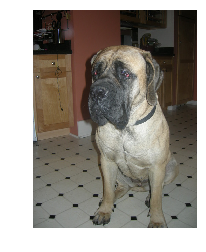

DOG detected!
Hello dog, your breed is Mastiff


Sample image: Curly-coated_retriever_03918.jpg


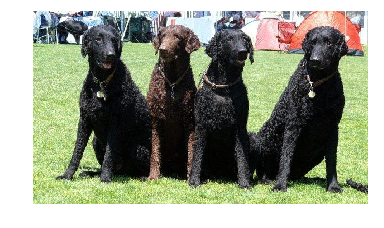

DOG detected!
Hello dog, your breed is Curly-coated retriever


Sample image: Bichon_frise_01743.jpg


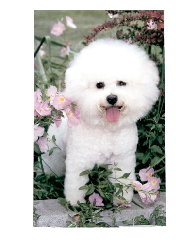

DOG detected!
Hello dog, your breed is Bichon frise


Sample image: Papillon_07497.jpg


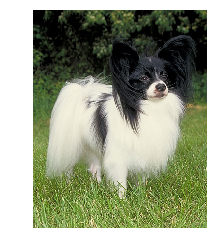

DOG detected!
Hello dog, your breed is Papillon


Sample image: Boston_terrier_02233.jpg


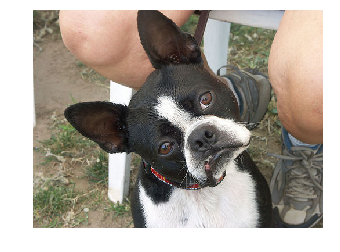

DOG detected!
Hello dog, your breed is Boston terrier




In [103]:
# check the run_app with sample image from the dog_files
# randomly selected a few images
sample_img_idx = [20, 125, 250, 500, 750]
for img_idx in sample_img_idx:
    label = dog_files[img_idx].split('/')[-1]
    print('Sample image: {}'.format(label))
    run_app(dog_files[img_idx])   

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Actually the output is better than I expected. All the dogs and human are detected. The app did not identify my cats as dog or human.

I uploaded my dog picture, which is the first picture below. He is a Yorkie-poo (mix of Yorkshire terrier and poodle) based on my friend, where I adopted him from. We don't have mixed dog class in the training data, so it would be diffifult to identify. I don't blame the classifer predicted result is Norfolk terrier. I googled Norfolk terrier, and I think my dog does look more like a Norfolk terrier than poople or Yorkshire terrier. I also tested another dog image (Alaskan malamute), which is classified correctly.

Possible improvement:
* Add more linear layers or increase the linear layer nodes in the transfer learning model classifier, which may help improve the model
* Try hyperparameter tuning such as using different optimizer, trying different weight initialization, selecting another loss function, modifing learning rate 
* Try different CNN models such as ResNet50, Xception, InceptionV3 et al. to build the transfer learning model  


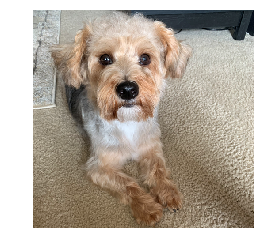

DOG detected!
Hello dog, your breed is Norfolk terrier


-----------------------------------------------------------


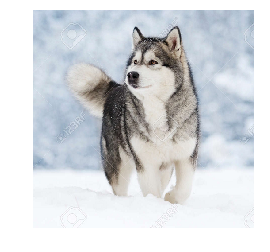

DOG detected!
Hello dog, your breed is Alaskan malamute


-----------------------------------------------------------


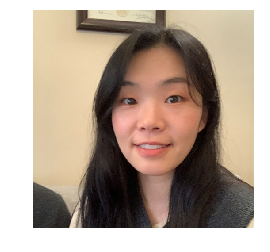

HUMAN detected!
Hello Human, you look like a Pomeranian


-----------------------------------------------------------


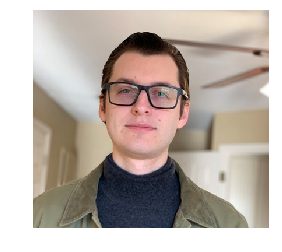

HUMAN detected!
Hello Human, you look like a Pointer


-----------------------------------------------------------


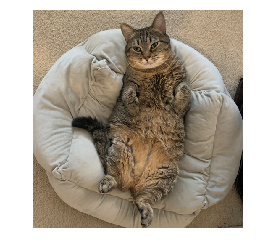

Neither HUMAN nor DOG detected!
Unable to identify!


-----------------------------------------------------------


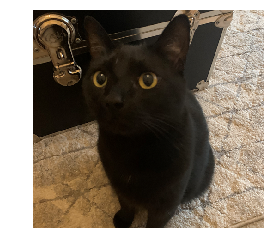

Neither HUMAN nor DOG detected!
Unable to identify!


-----------------------------------------------------------


In [104]:
## TODO: Execute your algorithm from Step 6 on at least 6 images on your computer.
## Feel free to use as many code cells as needed.
my_dog_files = ['./images/my_images/dog_1.png', './images/my_images/dog_2.png']
my_human_files = ['./images/my_images/human_1.png', './images/my_images/human_2.png']
my_other_files = ['./images/my_images/cat_1.png', './images/my_images/cat_2.png']

for file in np.hstack((my_dog_files, my_human_files, my_other_files)):
    run_app(file)
    print('-----------------------------------------------------------')